### Aufgabe 1

Eine Münze soll n-mal geworfen werden. Dabei soll jedes Ereignis «Kopf» oder «Zahl» gleichwahrscheinlich auftreten.

a)  Erstelle ein Pythonprogramm, welches dir diese Daten generiert und in die Datei «daten_p3_1_out.csv» speichert.

b)  Analysiere diese Daten, zähle, wie oft die beiden Ereignisse «Kopf» und «Zahl» aufgetreten sind.

c)  Erstelle ein Histogramm, welches diese Häufigkeiten visualisiert.

d)  Vergleiche diese Häufigkeiten mit der erwarteten (theoretischen Wahrscheinlichkeit) absolut und relativ. Gibt es Unterschiede – warum?


In [4]:
import random
import pandas as pd

# a)
datei_name_ausgabe = 'Daten/daten_p3_1_out.csv'

anzahl_wuerfe = int(input("Wie oft soll die Münze geworfen werden?"))

ergebnisse = []
for wurf in range(1, anzahl_wuerfe + 1):
    # wählt zufällig aus den beiden Eregnissen eines aus
    if random.choice(['Kopf', 'Zahl']) == 'Kopf':
        # wir codieren in einem numerischen Wert um
        ereignis = 'Kopf'
    else:
        ereignis = 'Zahl'
    ergebnisse.append(ereignis)

# Ergebnisse in einer CSV-Datei speichern
daten = pd.DataFrame(ergebnisse, columns=['Ereignis'])
# mit Index-Spalte "Wurf"
daten.index += 1  # Setzt den Index auf 1, damit der Wurfindex mit 1 beginnt
daten.index.name = 'Wurf'
daten.to_csv(datei_name_ausgabe)


Anzahl Kopf: 9988
Anzahl Zahl: 10012


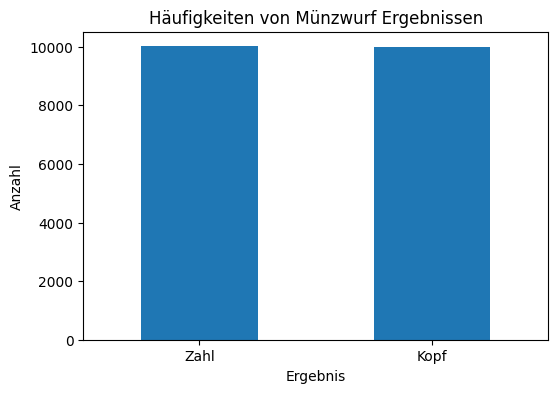

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# b) Einlesen der CSV-Datei
datei_name_eingabe = 'Daten/daten_p3_1_out.csv'

# Daten aus der CSV-Datei lesen
daten = pd.read_csv(datei_name_eingabe, index_col='Wurf')

# Häufigkeit der Ergebnisse berechnen
haeufigkeit = daten['Ereignis'].value_counts()

# b) Die Anzahl von Kopf und Zahl ausgeben
anzahl_kopf = haeufigkeit.get('Kopf', 0)
anzahl_zahl = haeufigkeit.get('Zahl', 0)
print("Anzahl Kopf:", anzahl_kopf)
print("Anzahl Zahl:", anzahl_zahl)

# c) Histogramm der Ergebnisse visualisieren
plt.figure(figsize=(6, 4))
haeufigkeit.plot(kind='bar')
plt.title('Häufigkeiten von Münzwurf Ergebnissen')
plt.xlabel('Ergebnis')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.show()


d) die relativen Häufigkeiten (Kopf / (Kopf + Zahl) und (Zahl / (Kopf + Zahl)) nähern sich der theoretischen Wahrscheinlichkeit 0.5. Dies ist das Gesetz der grossen Zahlen.

In [7]:
print("rel.Häufigkeit Kopf/(Kopf+Zahl):", anzahl_kopf / (anzahl_kopf + anzahl_zahl))
print("rel.Häufigkeit Zahl/(Kopf+Zahl):", anzahl_zahl / (anzahl_kopf + anzahl_zahl))

rel.Häufigkeit Kopf/(Kopf+Zahl): 0.4994
rel.Häufigkeit Zahl/(Kopf+Zahl): 0.5006
